## Modules

In [140]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, clear_output
import seaborn as sns

## Read CSV

In [141]:

csv_file = 'Accidentes.csv'  # Change this path to the actual location of your file
df = pd.read_csv(csv_file, encoding='ISO-8859-1')  # Or use encoding='latin1'

C:\Users\juanp\AppData\Local\Temp\ipykernel_7376\3390439521.py:2: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



## Widgets

Dropdown(description='Alcaldía:', options=('ALVARO OBREGON', 'AV INSURGENTES', 'AZCAPOTZALCO', 'BENITO JUAREZ'…

Dropdown(description='Event Type:', options=('All', 'ATROPELLADO', 'CAIDA DE CICLISTA', 'CAIDA DE PASAJERO', '…

Dropdown(description='Day:', index=4, options=('Domingo', 'Jueves', 'Lunes', 'Martes', 'Miércoles', 'Sábado', …

Dropdown(description='Metric:', options=('Total number of accidents', 'Accidents with injuries rate', 'Acciden…

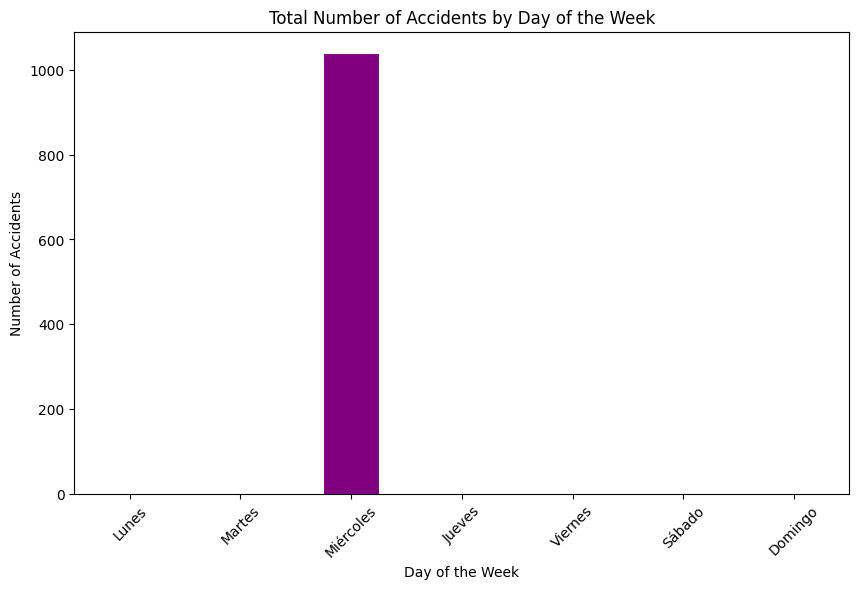

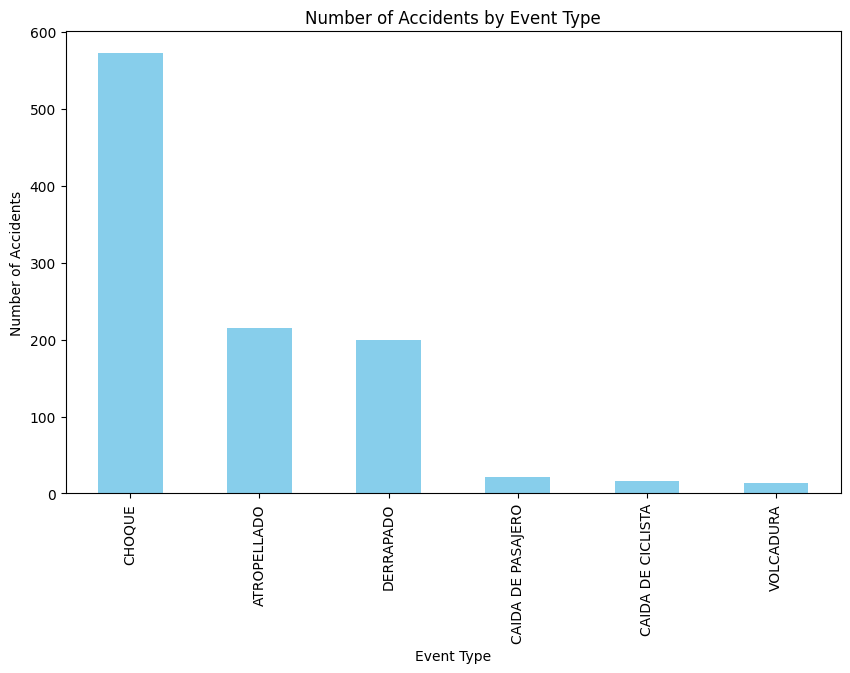

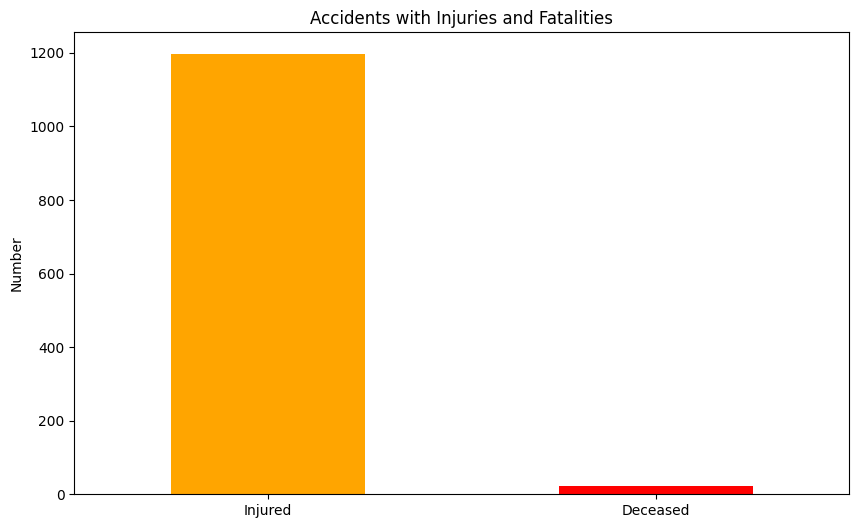

Total number of accidents: 1039


In [142]:

alcaldia_selector = widgets.Dropdown(options=sorted(df['alcaldia'].unique()), description='Alcaldía:')

# Add the "All" option in the event type
event_types = ['All'] + sorted(df['tipo_evento'].unique())
event_type_selector = widgets.Dropdown(options=event_types, description='Event Type:')

# List of valid days
valid_days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

df['dia'] = df['dia'].apply(lambda x: x.strip() if isinstance(x, str) else x) 
df = df[df['dia'].isin(valid_days)] 
day_selector = widgets.Dropdown(options=sorted(df['dia'].unique()), description='Day:')

# Widget to select the metric
metrics = ['Total number of accidents', 'Accidents with injuries rate', 'Accidents with fatalities rate', 'Average number of injured and deceased']
metric_selector = widgets.Dropdown(options=metrics, description='Metric:')

## Functions to plot

In [143]:

def plot_accidents_by_type(filtered_df):
    if filtered_df.empty:
        print("No data available to display the accidents by event type chart.")
        return
    
    plt.figure(figsize=(10, 6))
    filtered_df['tipo_evento'].value_counts().plot(kind='bar', color='skyblue')
    
    plt.title('Number of Accidents by Event Type')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Event Type')
    plt.show()

def plot_map(filtered_df):
    if filtered_df.empty:
        print("No data available to display the map.")
        return
    
    fig = px.scatter_mapbox(filtered_df, lat='latitud', lon='longitud', 
                            color='tipo_evento', size='personas_lesionadas',
                            hover_name='alcaldia', hover_data=['colonia', 'tipo_evento'],
                            zoom=10, height=500)
    
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(title="Accidents Map", title_x=0.5)
    
    fig.show()

def plot_accidents_with_injuries_fatalities(filtered_df):
    if filtered_df.empty:
        print("No data available to display the accidents with injuries and fatalities chart.")
        return
    
    plt.figure(figsize=(10, 6))
    filtered_df[['personas_lesionadas', 'personas_fallecidas']].sum().plot(kind='bar', color=['orange', 'red'])
    
    plt.title('Accidents with Injuries and Fatalities')
    plt.ylabel('Number')
    plt.xticks([0, 1], ['Injured', 'Deceased'], rotation=0)
    plt.show()


def plot_accidents_by_day(filtered_df):
    if filtered_df.empty:
        print("No data available to display the accidents by day chart.")
        return
    
    plt.figure(figsize=(10, 6))
    filtered_df['dia'].value_counts().reindex(valid_days).plot(kind='bar', color='purple')
    
    plt.title('Total Number of Accidents by Day of the Week')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Day of the Week')
    plt.xticks(rotation=45)
    plt.show()



## Calculate Metrics 

In [144]:

# Function to calculate the total number of accidents
def calculate_total_accidents(filtered_df):
    return len(filtered_df)

# Function to calculate the rate of accidents with injuries
def calculate_injury_rate(filtered_df):
    return (filtered_df['personas_lesionadas'] > 0).mean() * 100

# Function to calculate the rate of accidents with fatalities
def calculate_fatality_rate(filtered_df):
    return (filtered_df['personas_fallecidas'] > 0).mean() * 100

# Function to calculate the average number of injured and deceased per accident
def calculate_avg_injured_fatalities(filtered_df):
    avg_injured = filtered_df['personas_lesionadas'].mean()
    avg_deceased = filtered_df['personas_fallecidas'].mean()
    return avg_injured, avg_deceased

## Update Metrics and charts

In [145]:

def update_metric(filtered_df, metric):
    if filtered_df.empty:
        print("No data available to display the selected metric.")
        return
    
    if metric == 'Total number of accidents':
        total_accidents = calculate_total_accidents(filtered_df)
        print(f'Total number of accidents: {total_accidents}')
    
    elif metric == 'Accidents with injuries rate':
        injury_rate = calculate_injury_rate(filtered_df)
        print(f'Accidents with injuries rate: {injury_rate:.2f}%')
    
    elif metric == 'Accidents with fatalities rate':
        fatality_rate = calculate_fatality_rate(filtered_df)
        print(f'Accidents with fatalities rate: {fatality_rate:.2f}%')
    
    elif metric == 'Average number of injured and deceased':
        avg_injured, avg_deceased = calculate_avg_injured_fatalities(filtered_df)
        print(f'Average number of injured per accident: {avg_injured:.2f}')
        print(f'Average number of deceased per accident: {avg_deceased:.2f}')


def update_charts(change):
    # Apply filters
    filtered_df = filter_data()
    
    # Clear the previous output
    clear_output(wait=True)
    
    # Display the widgets and updated charts again
    display(alcaldia_selector, event_type_selector, day_selector, metric_selector)
    
    # Show updated charts
    plot_accidents_by_day(filtered_df)  # Chart of accidents by day of the week
    plot_accidents_by_type(filtered_df)  # Bar chart by event type
    plot_map(filtered_df)                # Interactive map
    plot_accidents_with_injuries_fatalities(filtered_df)  # Chart of injured and deceased
    
    # Update the metric panel
    update_metric(filtered_df, metric_selector.value)


## Conect Widgets

Dropdown(description='Alcaldía:', options=('ALVARO OBREGON', 'AV INSURGENTES', 'AZCAPOTZALCO', 'BENITO JUAREZ'…

Dropdown(description='Event Type:', options=('All', 'ATROPELLADO', 'CAIDA DE CICLISTA', 'CAIDA DE PASAJERO', '…

Dropdown(description='Day:', options=('Domingo', 'Jueves', 'Lunes', 'Martes', 'Miércoles', 'Sábado', 'Viernes'…

Dropdown(description='Metric:', options=('Total number of accidents', 'Accidents with injuries rate', 'Acciden…

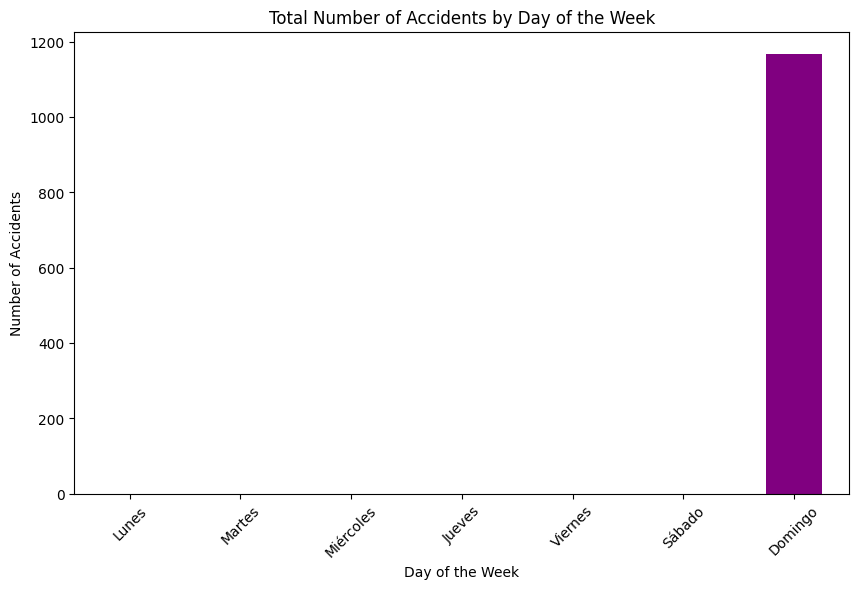

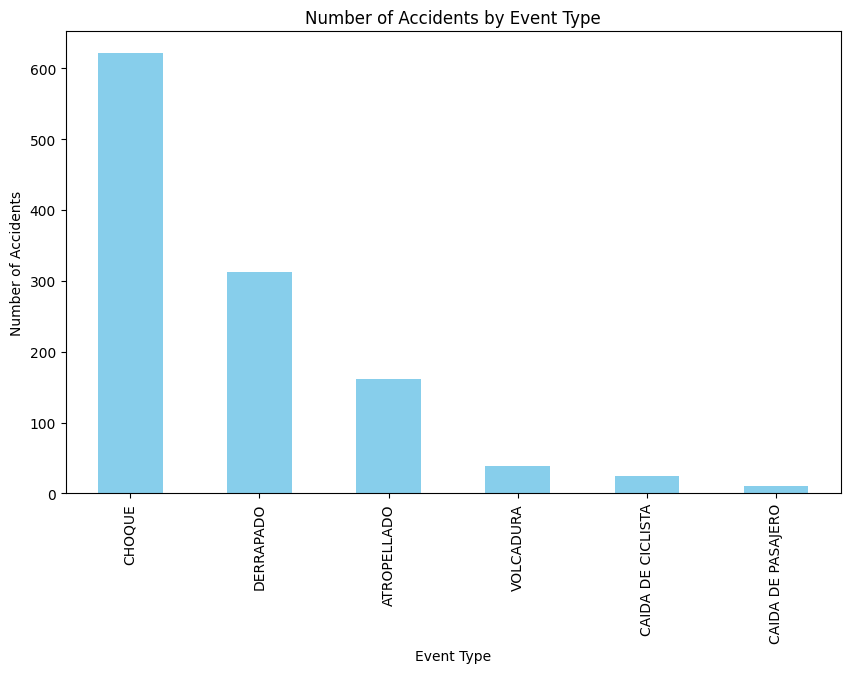

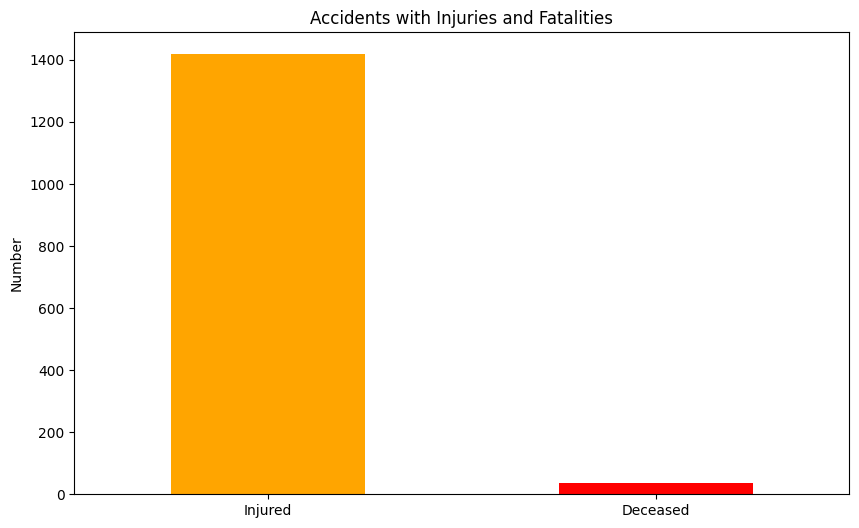

Total number of accidents: 1169


In [146]:

# 11. Connect widgets to the update function
alcaldia_selector.observe(update_charts, names='value')
event_type_selector.observe(update_charts, names='value')
day_selector.observe(update_charts, names='value')
metric_selector.observe(update_charts, names='value')

# 12. Call the initial function to display the dashboard
display(alcaldia_selector, event_type_selector, day_selector, metric_selector)
update_charts(None)
